In [1]:
from collections import defaultdict
from pprint import pprint

import copy
import facebook
import io
import matplotlib.pyplot as plt
import networkx as nx
import time

%matplotlib inline

In [2]:
def read_graph():
    return nx.read_edgelist('facebook_combined.txt')

graph = read_graph()

In [180]:
def draw_network(graph, values, name='test', draw_thresh=1, label_thresh=31, min_node_sz=30, max_node_sz=200):
    labels = {k : values[k] for k in values if values[k] > label_thresh}
    
    plt.figure(figsize=(10, 10))
    
    nodes_to_draw = [name for name in values if values[name] > draw_thresh]
    
    max_val = max(list(values.values()))
    
    sz_range = max_node_sz - min_node_sz
    
    sizes = [min_node_sz + (1. * values[n] / max_val * sz_range) for n in nodes_to_draw]
    
    subgraph = graph.subgraph(nodes_to_draw)
    
    nx.draw_networkx(subgraph, alpha=.3, width=.3, labels=labels, node_size=sizes)
    
    plt.savefig(str(name) +'.png')
    plt.axis("off")
    plt.show()

# Graph info

In [3]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [4]:
node_degree = nx.degree(graph)

In [5]:
to_del = [n for n in graph if graph.degree(n) <= 50]
graph.remove_nodes_from(to_del)

In [194]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 1144
Number of edges: 50324
Average degree:  87.9790


# Graph degrees

In [7]:
degrees = graph.degree()
print(degrees)

[('0', 19), ('9', 16), ('21', 18), ('25', 15), ('26', 17), ('56', 18), ('67', 18), ('107', 413), ('119', 14), ('122', 18), ('136', 99), ('200', 16), ('203', 16), ('239', 15), ('252', 16), ('271', 17), ('277', 17), ('304', 16), ('315', 14), ('322', 17), ('348', 56), ('414', 42), ('428', 58), ('1684', 236), ('1912', 408), ('353', 58), ('363', 52), ('366', 54), ('376', 57), ('475', 60), ('483', 113), ('484', 58), ('517', 58), ('526', 75), ('538', 42), ('563', 32), ('566', 60), ('580', 43), ('606', 44), ('637', 58), ('641', 34), ('651', 39), ('896', 79), ('897', 53), ('906', 73), ('916', 138), ('917', 58), ('921', 99), ('925', 150), ('927', 68), ('930', 16), ('932', 57), ('934', 80), ('941', 34), ('942', 37), ('946', 152), ('947', 111), ('952', 82), ('953', 105), ('954', 37), ('957', 49), ('960', 91), ('966', 111), ('967', 93), ('975', 43), ('978', 94), ('980', 116), ('982', 63), ('983', 57), ('993', 146), ('995', 52), ('997', 92), ('999', 71), ('1003', 88), ('1004', 116), ('1006', 129), (

# Graph plot

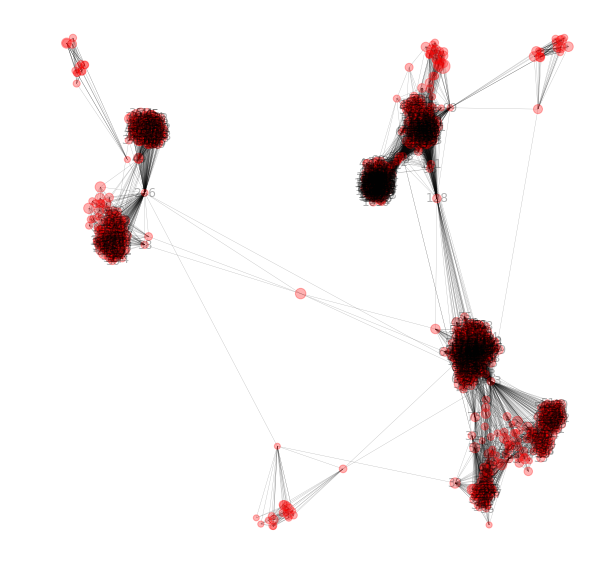

In [183]:
draw_network(graph, dict(degrees), name='degree_graph')

# Histogram of node degrees in 15 bins

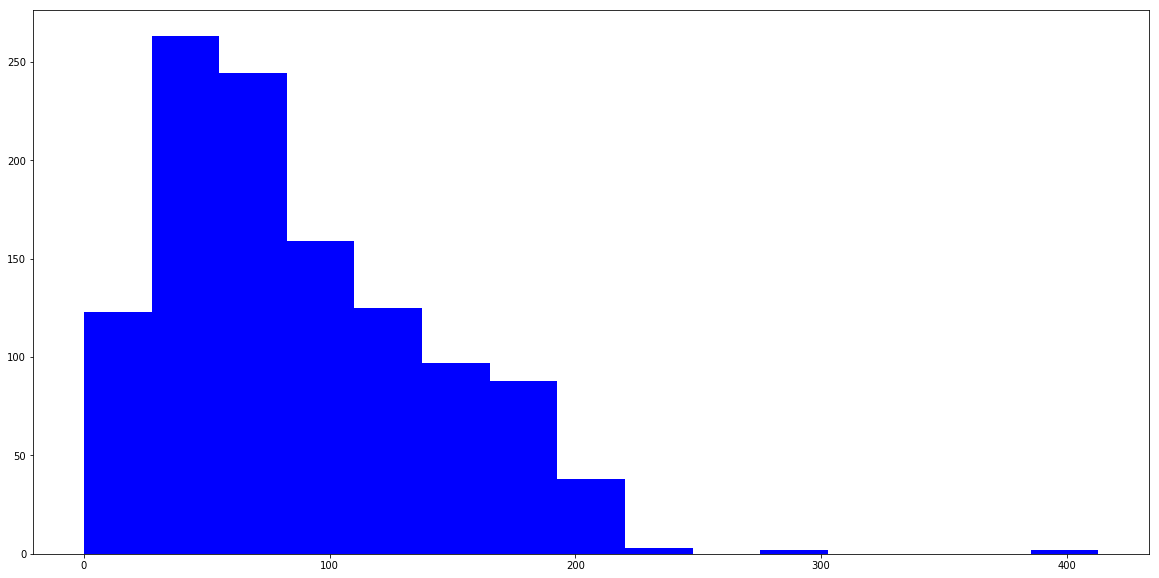

In [190]:
# degree_sequence = sorted(node_degree, reverse=True)
plt.figure(figsize=(20, 10))
plt.hist([ng[1] for ng in node_degree], bins = 15, facecolor='b')
plt.savefig('histogram_node_degrees.png')
plt.show()

# Clustering node coef.

In [191]:
clustering = nx.clustering(graph, nodes=None, weight=None)

[(k, clustering[k]) for k in sorted(clustering, key=clustering.get, reverse=True)]

[('694', 1.0),
 ('781', 1.0),
 ('824', 1.0),
 ('3521', 1.0),
 ('747', 0.9818181818181818),
 ('119', 0.978021978021978),
 ('25', 0.9714285714285714),
 ('239', 0.9619047619047619),
 ('705', 0.9615384615384616),
 ('200', 0.9583333333333334),
 ('9', 0.9416666666666667),
 ('26', 0.9338235294117647),
 ('271', 0.9338235294117647),
 ('277', 0.9338235294117647),
 ('203', 0.9333333333333333),
 ('252', 0.9333333333333333),
 ('3838', 0.9285714285714286),
 ('315', 0.9230769230769231),
 ('686', 0.9230769230769231),
 ('697', 0.9230769230769231),
 ('713', 0.9230769230769231),
 ('719', 0.9230769230769231),
 ('745', 0.9230769230769231),
 ('805', 0.9230769230769231),
 ('823', 0.9230769230769231),
 ('828', 0.9230769230769231),
 ('830', 0.9230769230769231),
 ('3456', 0.9102564102564102),
 ('2532', 0.9058608058608059),
 ('2606', 0.9012612612612613),
 ('3495', 0.9010989010989011),
 ('304', 0.9),
 ('2657', 0.9),
 ('2407', 0.8981555733761026),
 ('1396', 0.8977272727272727),
 ('2554', 0.895278167367929),
 ('199

# Ploting the graph with clustering score as node size

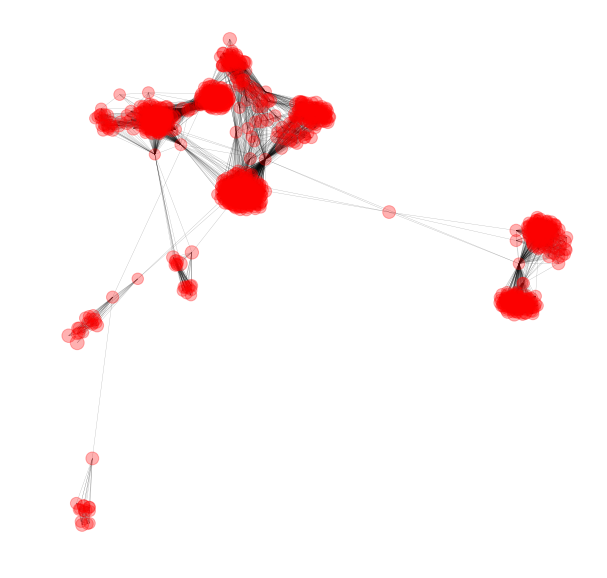

In [184]:
draw_network(graph, clustering, draw_thresh=0, name='clustering_graph')

# Triangles

In [122]:
triangles = nx.triangles(graph)

[(k, triangles[k]) for k in sorted(triangles, key=triangles.get, reverse=True)]

[('1912', 24539),
 ('107', 16947),
 ('2347', 16641),
 ('2206', 15765),
 ('2266', 15754),
 ('2233', 15341),
 ('2464', 15183),
 ('2543', 15132),
 ('2078', 15099),
 ('2218', 15050),
 ('2123', 14892),
 ('2142', 14878),
 ('1993', 14855),
 ('2244', 14805),
 ('2340', 14740),
 ('2507', 14733),
 ('2410', 14686),
 ('2229', 14635),
 ('2240', 14633),
 ('2088', 14508),
 ('2073', 14503),
 ('1985', 14456),
 ('2220', 14449),
 ('2059', 14429),
 ('2604', 14372),
 ('2309', 14342),
 ('2131', 14332),
 ('2590', 14297),
 ('2369', 14205),
 ('2607', 14094),
 ('2602', 14069),
 ('2090', 14032),
 ('2611', 13968),
 ('2201', 13963),
 ('2188', 13943),
 ('2586', 13876),
 ('2560', 13807),
 ('1946', 13771),
 ('2118', 13733),
 ('2601', 13729),
 ('2324', 13722),
 ('1943', 13699),
 ('2150', 13691),
 ('1938', 13673),
 ('1983', 13628),
 ('2030', 13584),
 ('2172', 13561),
 ('1962', 13546),
 ('1917', 13528),
 ('2624', 13515),
 ('2331', 13485),
 ('2625', 13465),
 ('2593', 13429),
 ('2290', 13408),
 ('2275', 13333),
 ('2564', 1

# Transitivity

In [14]:
nx.transitivity(graph)

0.6726591264868923

# Average clustering coef.

In [15]:
nx.average_clustering(graph)

0.6884001779364164

In [193]:
degree_centrality = nx.degree_centrality(graph)
degree_centrality

{'0': 0.01662292213473316,
 '9': 0.01399825021872266,
 '21': 0.015748031496062992,
 '25': 0.013123359580052493,
 '26': 0.014873140857392827,
 '56': 0.015748031496062992,
 '67': 0.015748031496062992,
 '107': 0.36132983377077865,
 '119': 0.012248468941382328,
 '122': 0.015748031496062992,
 '136': 0.08661417322834646,
 '200': 0.01399825021872266,
 '203': 0.01399825021872266,
 '239': 0.013123359580052493,
 '252': 0.01399825021872266,
 '271': 0.014873140857392827,
 '277': 0.014873140857392827,
 '304': 0.01399825021872266,
 '315': 0.012248468941382328,
 '322': 0.014873140857392827,
 '348': 0.04899387576552931,
 '414': 0.03674540682414698,
 '428': 0.05074365704286964,
 '1684': 0.20647419072615925,
 '1912': 0.3569553805774278,
 '353': 0.05074365704286964,
 '363': 0.045494313210848646,
 '366': 0.047244094488188976,
 '376': 0.049868766404199474,
 '475': 0.05249343832020997,
 '483': 0.09886264216972879,
 '484': 0.05074365704286964,
 '517': 0.05074365704286964,
 '526': 0.06561679790026247,
 '538':

# Ploting the graph with degree centrality values as node size

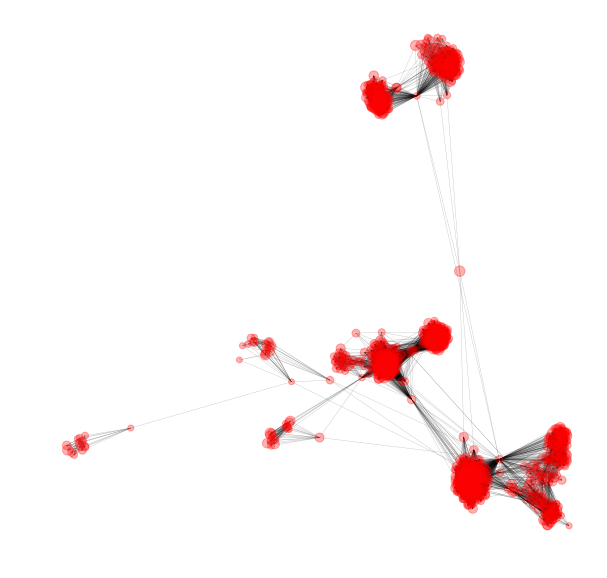

In [185]:
draw_network(graph, degree_centrality, draw_thresh=0, name='degree_centrality_graph')

In [123]:
closeness_centrality = nx.closeness_centrality(graph)

[(k, closeness_centrality[k]) for k in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)]

[('107', 0.5277524860733759),
 ('1577', 0.4567657625663085),
 ('1718', 0.4538587410066184),
 ('428', 0.45152389192348186),
 ('1465', 0.44727592116449966),
 ('563', 0.4469255287468228),
 ('1663', 0.41764307280038016),
 ('1352', 0.41749025791827243),
 ('1126', 0.41250935462423666),
 ('1621', 0.41161647723327516),
 ('1361', 0.41057965991026935),
 ('1376', 0.41057965991026935),
 ('1835', 0.41013690686219934),
 ('1173', 0.40940110329768165),
 ('1912', 0.40808328858749593),
 ('925', 0.4073548285935875),
 ('1522', 0.4072094485691073),
 ('916', 0.40561709025618153),
 ('1029', 0.4043234850781852),
 ('1289', 0.4037511942288176),
 ('1509', 0.4033230381373767),
 ('1684', 0.40261145902986545),
 ('1074', 0.4021857155060411),
 ('1334', 0.4019023863651422),
 ('1617', 0.40161945613890837),
 ('921', 0.4000704329911075),
 ('1483', 0.3972844271903338),
 ('483', 0.3968698695271786),
 ('1590', 0.3964561761260037),
 ('1312', 0.3961808593370273),
 ('1028', 0.3950834054330466),
 ('1540', 0.3949466510524883),
 

# Ploting the graph with closeness centrality values as node size

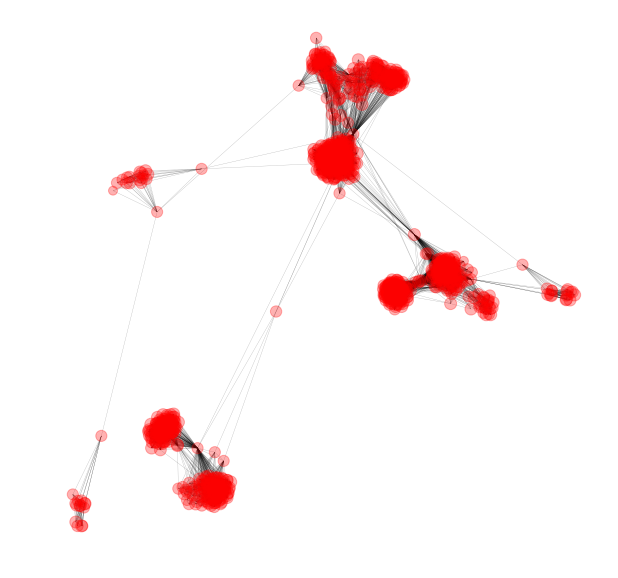

In [186]:
draw_network(graph, closeness_centrality, draw_thresh=0, name='closeness_centrality_degree_graph')

In [124]:
# betweenness_centrality = nx.betweenness_centrality(graph)

[(k, betweenness_centrality[k]) for k in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)]

[('107', 0.5512902223674101),
 ('1684', 0.3449641806067504),
 ('1912', 0.18504310708902588),
 ('1718', 0.13770920491047958),
 ('1577', 0.12526345998745356),
 ('1465', 0.10066319978751888),
 ('428', 0.04931690386474627),
 ('2543', 0.04619116250788383),
 ('1085', 0.04066954636734319),
 ('563', 0.033419113611229054),
 ('3437', 0.03226205872806646),
 ('2347', 0.027845502681952607),
 ('698', 0.024196625159158085),
 ('0', 0.020545456146161833),
 ('567', 0.0154183821024731),
 ('136', 0.014444809416609078),
 ('1941', 0.014295795494053505),
 ('1361', 0.014142234343978703),
 ('2266', 0.012679323789592684),
 ('2542', 0.010755772884972554),
 ('2468', 0.009735118423726671),
 ('483', 0.009609848166179446),
 ('1663', 0.006783614215471233),
 ('1352', 0.006779423251648679),
 ('1126', 0.005601647639187875),
 ('526', 0.005302145688735532),
 ('1173', 0.005216294231381455),
 ('1621', 0.005061068643348496),
 ('2007', 0.004813426748878463),
 ('1376', 0.004790670481479164),
 ('1289', 0.004746324475331581),
 (

# Ploting the graph with betweenness centrality values as node size# 

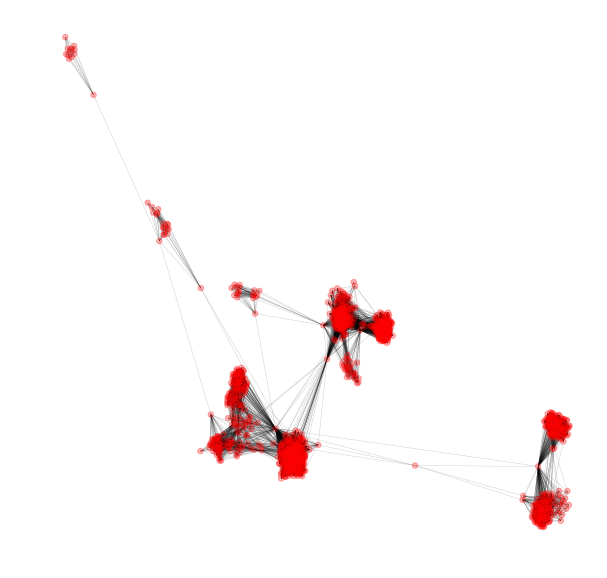

In [187]:
draw_network(graph, betweenness_centrality, draw_thresh=0, name='betweenness_centrality_graph')

In [125]:
pagerank = nx.pagerank(graph, alpha=0.85)

[(k, pagerank[k]) for k in sorted(pagerank, key=pagerank.get, reverse=True)]

[('107', 0.004510338411349838),
 ('1684', 0.0034493698947954867),
 ('1912', 0.0031251277620717626),
 ('483', 0.001970745595528575),
 ('2543', 0.0018475102110849387),
 ('1888', 0.0018294608467210411),
 ('2347', 0.0018136076399103945),
 ('1800', 0.0017954302891678192),
 ('1663', 0.0017229227501079048),
 ('1352', 0.0017179479066168353),
 ('1584', 0.0016351325045544638),
 ('1730', 0.0016235641052062184),
 ('1199', 0.0016119043658173158),
 ('1086', 0.001602389171473122),
 ('1431', 0.0015747717449224148),
 ('1589', 0.0015606736916840276),
 ('1746', 0.0015396454389210738),
 ('3101', 0.001514012189421624),
 ('1768', 0.001506223597838267),
 ('1833', 0.0014721030749202163),
 ('1390', 0.0014692707790949645),
 ('1804', 0.0014596024977415762),
 ('1126', 0.0014571279811373384),
 ('1827', 0.0014525019196129872),
 ('3082', 0.0014505598346903758),
 ('1941', 0.0014482348213772154),
 ('1377', 0.0014434375279288071),
 ('1612', 0.001429953648504899),
 ('1707', 0.0014284535330368647),
 ('1714', 0.0014186102

# Ploting the graph with page rank values as node size

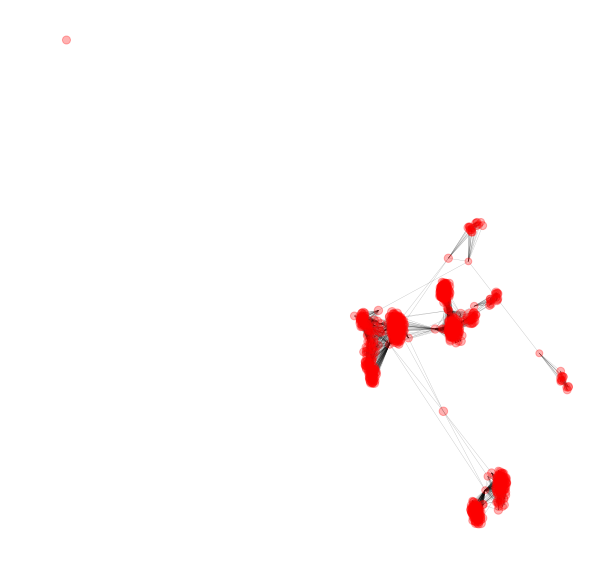

In [188]:
draw_network(graph, pagerank, draw_thresh=0, name='page_rank_graph')

In [24]:
# cliques = list(nx.find_cliques(graph))

In [25]:
# cliques

In [26]:
def get_subgraph(graph, min_degree):
    """Return a subgraph containing nodes whose degree is
    greater than min_degree.
    Args:
      graph........a networkx graph
      min_degree...degree threshold
    Returns:
      a networkx graph, filtered as defined above.
    """
    ###TODO
    ###
    
    node_list = [i for i in graph.nodes() if graph.degree(i) > min_degree]
    return graph.subgraph(node_list)               

subgraph = get_subgraph(graph, 1)

print('subgraph has %d nodes and %d edges' % (subgraph.order(), subgraph.number_of_edges()))

subgraph has 1143 nodes and 50324 edges


In [27]:
def girvan_newman(G, minsize=30, maxsize=100):
    if G.order() == 1:
        return [G.nodes()]
    
    def find_best_edge(G0):
        eb = nx.edge_betweenness_centrality(G)
        return sorted(eb.items(), key=lambda x: x[1], reverse=True)
    
    components = [c for c in nx.connected_component_subgraphs(G)]
    edges_removed=0
    edge_to_remove = find_best_edge(G)
    while len(components) == 1:
        for n in edge_to_remove: 
            if len(components) == 1:
                G.remove_edge(*n[0])
                edges_removed+=1
                components = [c for c in nx.connected_component_subgraphs(G)]
    print('removed %d edges' %(edges_removed))

    comp = [c for c in components]
    comp_size=[i.order() for i in comp]
    print('Component sizes='+str(comp_size))
    result=[]
    for c in comp:
            if c.order() >maxsize:
                result.extend(girvan_newman(c,minsize,maxsize))
            elif (c.order() in range(minsize,maxsize+1)):
                print('stopping for %d' %(c.order()))
                result.append(c.nodes())
                                
    return result
result = girvan_newman(subgraph.copy(), minsize=50, maxsize=100)

removed 9 edges
Component sizes=[1128, 15]
removed 21 edges
Component sizes=[892, 236]
removed 1 edges
Component sizes=[873, 19]
removed 26 edges
Component sizes=[425, 448]
removed 10 edges
Component sizes=[407, 18]
removed 1389 edges
Component sizes=[406, 1]
removed 185 edges
Component sizes=[383, 23]
removed 1 edges
Component sizes=[172, 211]
removed 1 edges
Component sizes=[171, 1]
removed 4 edges
Component sizes=[170, 1]
removed 1360 edges
Component sizes=[169, 1]
removed 2 edges
Component sizes=[162, 7]
removed 332 edges
Component sizes=[161, 1]
removed 2 edges
Component sizes=[154, 7]
removed 5 edges
Component sizes=[153, 1]
removed 162 edges
Component sizes=[139, 14]
removed 5 edges
Component sizes=[135, 4]
removed 81 edges
Component sizes=[134, 1]
removed 1 edges
Component sizes=[133, 1]
removed 16 edges
Component sizes=[131, 2]
removed 2 edges
Component sizes=[130, 1]
removed 910 edges
Component sizes=[129, 1]
removed 1 edges
Component sizes=[128, 1]
removed 5 edges
Component 

removed 15 edges
Component sizes=[207, 1]
removed 2 edges
Component sizes=[200, 7]
removed 6 edges
Component sizes=[199, 1]
removed 7 edges
Component sizes=[198, 1]
removed 3 edges
Component sizes=[194, 4]
removed 226 edges
Component sizes=[190, 4]
removed 4 edges
Component sizes=[188, 2]
removed 7 edges
Component sizes=[187, 1]
removed 1 edges
Component sizes=[183, 4]
removed 4 edges
Component sizes=[182, 1]
removed 107 edges
Component sizes=[181, 1]
removed 1 edges
Component sizes=[179, 2]
removed 8 edges
Component sizes=[178, 1]
removed 4 edges
Component sizes=[172, 6]
removed 7 edges
Component sizes=[171, 1]
removed 2 edges
Component sizes=[170, 1]
removed 28 edges
Component sizes=[168, 2]
removed 4 edges
Component sizes=[166, 2]
removed 2 edges
Component sizes=[165, 1]
removed 77 edges
Component sizes=[164, 1]
removed 2 edges
Component sizes=[163, 1]
removed 6 edges
Component sizes=[162, 1]
removed 1 edges
Component sizes=[161, 1]
removed 193 edges
Component sizes=[160, 1]
removed

In [28]:
print('final cluster sizes:')
[len(x) for x in result]

final cluster sizes:


[100, 99, 73, 89, 99, 100, 98]

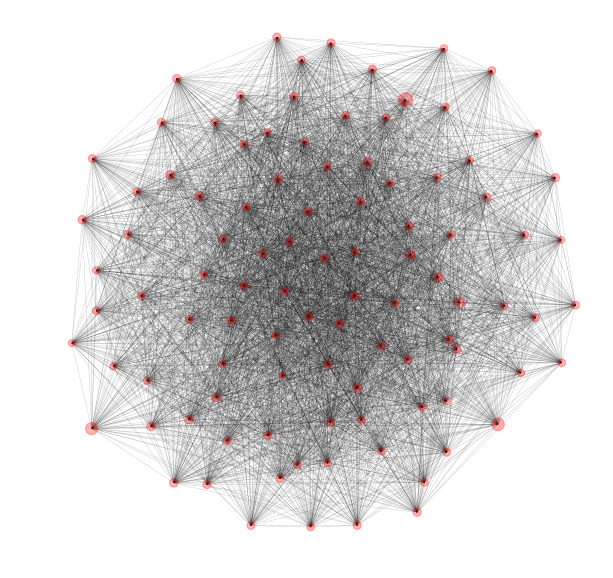

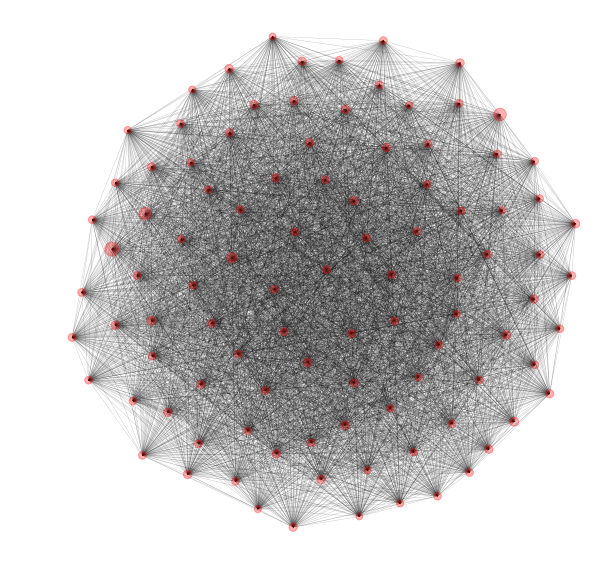

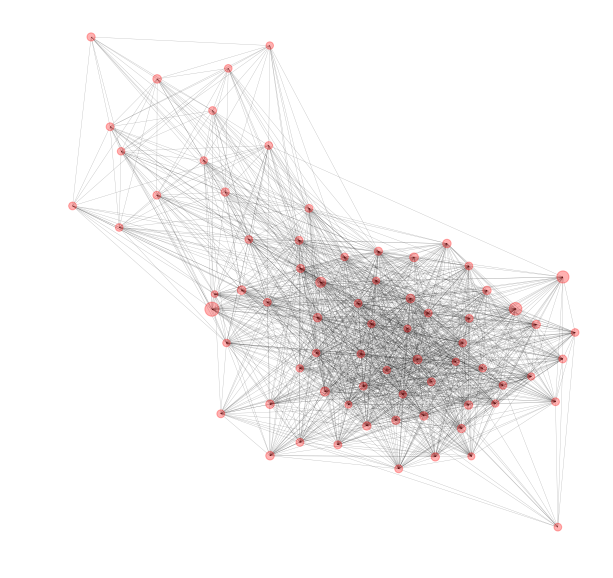

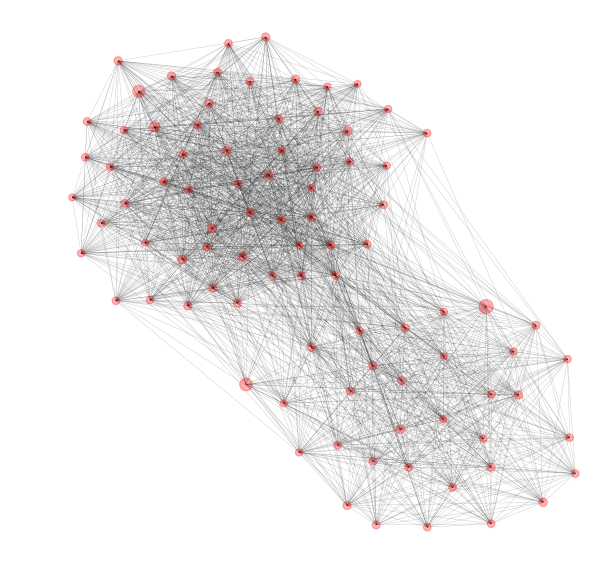

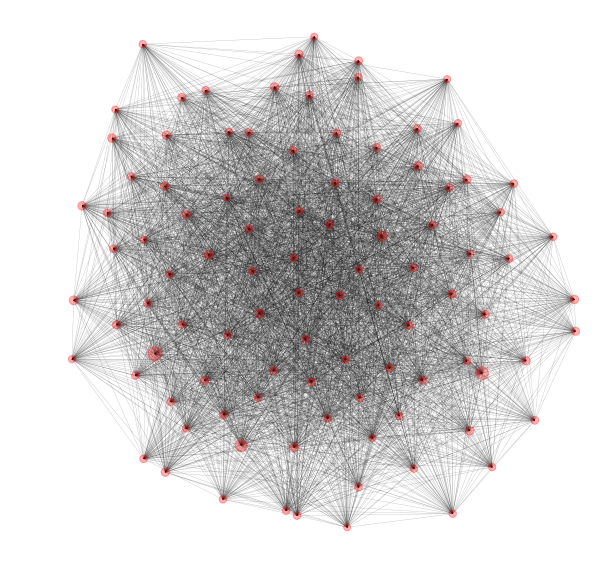

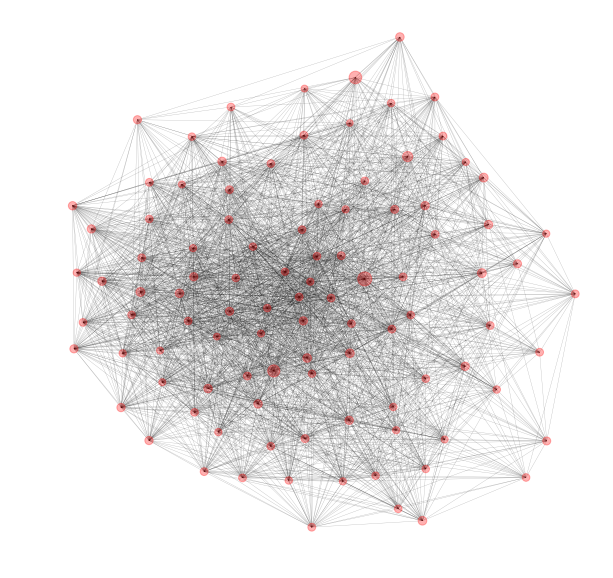

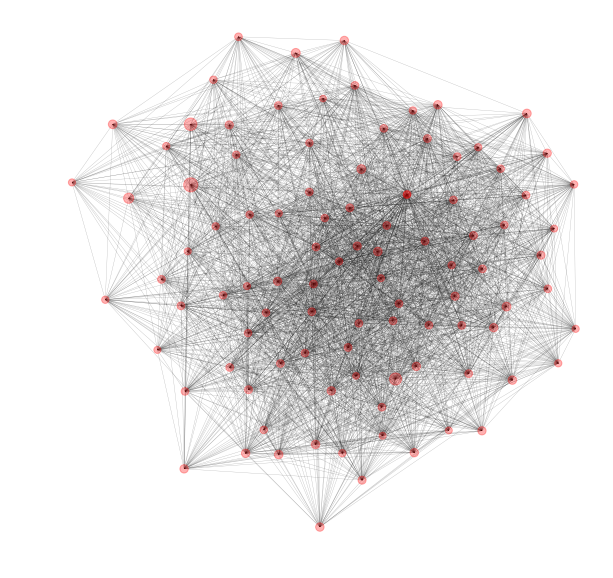

In [189]:
# Draw each cluster separately.
for i, cluster in enumerate(result):
    draw_network(graph.subgraph(cluster), pagerank, draw_thresh=0, name='cluster_'+ str(i) +'_')

In [30]:
def volume(nodes, graph):
    """
    Compute the volume for a set of `nodes`, which
    is the number of edges in `graph` with at least one end in
    nodes.
    Args:
      nodes...a list of strings for the nodes to compute the volume of.
      graph...a networkx graph
    """
    return len(graph.edges(nodes))

def cut(S, T, graph):
    """
    Compute the cut-set of the cut (S,T), which is
    the set of edges that have one endpoint in S and
    the other in T.
    Args:
      S.......set of nodes in first subset
      T.......set of nodes in second subset
      graph...networkx graph
    Returns:
      An int representing the cut-set.
    """
    cut_value = 0
    for i in S:
        for j in T:
            if graph.has_edge(i,j):
                cut_value+=1
    return cut_value
    
def norm_cut_v(S, T, graph):
    """
    The normalized cut value for the cut S/T. (See lec06.)
    Args:
      S.......set of nodes in first subset
      T.......set of nodes in second subset
      graph...networkx graph
    Returns:
      An float representing the normalized cut value
    """
    vol_s = volume(S,graph)
    vol_t = volume(T,graph)
    cut_value = cut(S, T, graph)
    ncv = (cut_value/float(vol_s)) +  (cut_value/float(vol_t))
    return ncv

def score_clusters(clusters, graph):
    """
    Compute the normalized cut value for each cluster returned 
    by the girvan newman algorithm above. To compute the value
    for one cluster, we consider the cut in which S is the
    proposed cluster, and T are all the other nodes in the graph.
    E.g., if the graph has nodes [A,B,C,D,E], and the proposed cluster
    is [A,B], then the cut value is computed on the cut
    S=[A,B], T=[C,D,E].
    
    Args:
      clusters....list of lists of strings representing the clusters
                  returned by the Girvan Newman algorithm.
      graph.......a networkx graph
    Returns:
      list of floats containing the normalized cut values for each cluster.
    """
    values = []
    for nodes in result:
        s=set(nodes)
        graph_set = set(subgraph.nodes())
        t = graph_set - s
        norm_cut_values = norm_cut_v(s,t,graph)
        values.append(norm_cut_values)
    return values

score_clusters(result, subgraph)

[0.5487506359668747,
 0.8331310054052443,
 0.15834159869934084,
 0.11967490115237742,
 0.7756786096624919,
 0.11943445504535329,
 0.1894417516193014]

# Link prediction¶
Next, we'll consider the link prediction problem. In particular, we will remove all of the edges of node '1269' and compute our accuracy at recovering those links.

In [56]:
def evaluate(scores, graph, n=10):
    predicted_edges = [x[0] for x in sorted(scores, key=lambda x: x[1], reverse=True)[:n]]
    return 1. * len([x for x in predicted_edges if graph.has_edge(*x)]) / len(predicted_edges)

def jaccard(graph, node):
    scores = []
    neighborsi = set(graph.neighbors(node))
    for n in graph.nodes():
        if n != node and not graph.has_edge(node, n):
            neighborsj = set(graph.neighbors(n))
            score = 1. * (len(neighborsi & neighborsj)) / (len(neighborsi | neighborsj))
            scores.append(((node, n), score))
    return scores

def jaccard_wt(graph, node):
    scores = []
    deg = 0
    neighborsi = set(graph.neighbors(node))
    adeg = sum([graph.degree(i) for i in neighborsi])
    for n in graph.nodes():
        if n != node and not graph.has_edge(node, n):
            neighborsj = set(graph.neighbors(n))
            bdeg = sum([graph.degree(j) for j in neighborsj])
            i = neighborsi.intersection(neighborsj)
            deg = sum([(1/float(graph.degree(x))) for x in i]) 
            score = deg / ((1/(float(adeg))) + (1/(float(bdeg))))
            scores.append(((node, n), score))
    return scores

def jaccard_wt1(graph, node):
    scores = []
    deg = 0
    neighborsi = set(graph.neighbors(node))
    adeg = sum([clustering[i] for i in neighborsi])
    for n in graph.nodes():
        if n != node and not graph.has_edge(node, n):
            neighborsj = set(graph.neighbors(n))
            bdeg = sum([clustering[j] for j in neighborsj])
            i = neighborsi.intersection(neighborsj)
            deg = sum([(1/float(clustering[x])) for x in i]) 
            score = deg / ((1/(float(adeg))) + (1/(float(bdeg))))
            scores.append(((node, n), score))
    return scores

In [112]:
test_nodes = [node for i, node in enumerate(graph.nodes()) if node != '3980' and i <= 100]

accs = []

for test_node in test_nodes:
    G_train = subgraph.copy()

    edges_to_rem = subgraph.edges(test_node)
    
    for i, edge in enumerate(edges_to_rem):
        print(edge)
        G_train.remove_edge(edge[0], edge[1])
        if i == 10:
            break
    
    jaccard_wt_scores = jaccard_wt(G_train, test_node)
    acc = evaluate(jaccard_wt_scores, subgraph, n=10)
    
    print('original graph has %d nodes and %d edges' % (subgraph.order(), subgraph.number_of_edges()))
    print('train graph has %d nodes and %d edges' % (G_train.order(), G_train.number_of_edges()))

    print('removed the following edges:')
    edges_to_rem

    print(test_node)
    print('jaccard_wt accuracy=%.3f' % acc)
    accs.append(acc)

('0', '9')
('0', '21')
('0', '25')
('0', '26')
('0', '56')
('0', '67')
('0', '107')
('0', '119')
('0', '122')
('0', '136')
('0', '200')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
0
jaccard_wt accuracy=1.000
('9', '0')
('9', '21')
('9', '25')
('9', '26')
('9', '56')
('9', '67')
('9', '119')
('9', '122')
('9', '200')
('9', '203')
('9', '252')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
9
jaccard_wt accuracy=0.900
('21', '0')
('21', '9')
('21', '25')
('21', '26')
('21', '56')
('21', '67')
('21', '119')
('21', '122')
('21', '136')
('21', '200')
('21', '203')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
21
jaccard_wt accuracy=1.000
('25', '0')
('25', '9')
('25', '21')
('25', '26')
('25', '56')
('25', '67')
('25', '119')
('25', '122')
('25', '200')
('25', '203')
('25', '239

('366', '107')
('366', '348')
('366', '353')
('366', '363')
('366', '373')
('366', '374')
('366', '376')
('366', '378')
('366', '391')
('366', '395')
('366', '400')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
366
jaccard_wt accuracy=0.700
('376', '107')
('376', '348')
('376', '353')
('376', '363')
('376', '366')
('376', '370')
('376', '373')
('376', '374')
('376', '378')
('376', '391')
('376', '395')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
376
jaccard_wt accuracy=0.900
('475', '107')
('475', '348')
('475', '353')
('475', '363')
('475', '366')
('475', '370')
('475', '373')
('475', '374')
('475', '376')
('475', '378')
('475', '391')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
475
jaccard_wt accuracy=0.900
('483', '107')
('483', '348')
('483', '353')
('483', '363')
(

original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
941
jaccard_wt accuracy=0.300
('942', '107')
('942', '483')
('942', '917')
('942', '941')
('942', '954')
('942', '1014')
('942', '1018')
('942', '1020')
('942', '1032')
('942', '1066')
('942', '1099')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
942
jaccard_wt accuracy=0.900
('946', '107')
('946', '916')
('946', '925')
('946', '927')
('946', '947')
('946', '952')
('946', '960')
('946', '966')
('946', '967')
('946', '993')
('946', '1003')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
946
jaccard_wt accuracy=0.400
('947', '107')
('947', '897')
('947', '916')
('947', '927')
('947', '946')
('947', '978')
('947', '993')
('947', '999')
('947', '1017')
('947', '1028')
('947', '1049')
original graph has 1143 nodes and 50324 edges
train

original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1018
jaccard_wt accuracy=0.700
('1019', '107')
('1019', '896')
('1019', '1021')
('1019', '1036')
('1019', '1060')
('1019', '1067')
('1019', '1100')
('1019', '1104')
('1019', '1129')
('1019', '1192')
('1019', '1204')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1019
jaccard_wt accuracy=0.800
('1020', '107')
('1020', '483')
('1020', '917')
('1020', '941')
('1020', '942')
('1020', '954')
('1020', '1014')
('1020', '1032')
('1020', '1066')
('1020', '1099')
('1020', '1102')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1020
jaccard_wt accuracy=0.800
('1021', '107')
('1021', '896')
('1021', '1009')
('1021', '1019')
('1021', '1036')
('1021', '1060')
('1021', '1067')
('1021', '1100')
('1021', '1104')
('1021', '1120')
('1021', '1129')
or

You will next implement a modified version of Jaccard as follows: $$
jaccard_{wt}(A, B) = \frac{\sum_{i \in (A \cap B)} \frac{1}{deg(i)}}{\frac{1}{\sum_{i \in A} deg(i)} + \frac{1}{\sum_{j \in B} deg(j)}}
$$ where $A$ and $B$ are sets of neighbors of two nodes to be scored, and $deg(i)$ is the degree of node $i$.

This method attempts to account for the fact that if we share a neighbor that has low degree, we should have a higher recommendation score than if we share a neighbor with high degree. (E.g., two people that like the relatively obscure band Gang of Four are probably more similar than two people that like Justin Bieber).

In [110]:
test_nodes = [node for i, node in enumerate(graph.nodes()) if node != '3980' and i <= 100]

accs = []

for test_node in test_nodes:
    G_train = subgraph.copy()

    edges_to_rem = subgraph.edges(test_node)
    
    for i, edge in enumerate(edges_to_rem):
        print(edge)
        G_train.remove_edge(edge[0], edge[1])
        if i == 10:
            break
    
    jaccard_wt_scores = jaccard(G_train, test_node)
    acc = evaluate(jaccard_wt_scores, subgraph, n=10)
    
    print('original graph has %d nodes and %d edges' % (subgraph.order(), subgraph.number_of_edges()))
    print('train graph has %d nodes and %d edges' % (G_train.order(), G_train.number_of_edges()))

    print('removed the following edges:')
    edges_to_rem

    print(test_node)
    print('jaccard_wt accuracy=%.3f' % acc)
    accs.append(acc)

print('Average accuracy:')
sum(accs) / len(accs)

('0', '9')
('0', '21')
('0', '25')
('0', '26')
('0', '56')
('0', '67')
('0', '107')
('0', '119')
('0', '122')
('0', '136')
('0', '200')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
0
jaccard_wt accuracy=1.000
('9', '0')
('9', '21')
('9', '25')
('9', '26')
('9', '56')
('9', '67')
('9', '119')
('9', '122')
('9', '200')
('9', '203')
('9', '252')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
9
jaccard_wt accuracy=0.900
('21', '0')
('21', '9')
('21', '25')
('21', '26')
('21', '56')
('21', '67')
('21', '119')
('21', '122')
('21', '136')
('21', '200')
('21', '203')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
21
jaccard_wt accuracy=1.000
('25', '0')
('25', '9')
('25', '21')
('25', '26')
('25', '56')
('25', '67')
('25', '119')
('25', '122')
('25', '200')
('25', '203')
('25', '239

('366', '107')
('366', '348')
('366', '353')
('366', '363')
('366', '373')
('366', '374')
('366', '376')
('366', '378')
('366', '391')
('366', '395')
('366', '400')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
366
jaccard_wt accuracy=0.700
('376', '107')
('376', '348')
('376', '353')
('376', '363')
('376', '366')
('376', '370')
('376', '373')
('376', '374')
('376', '378')
('376', '391')
('376', '395')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
376
jaccard_wt accuracy=0.900
('475', '107')
('475', '348')
('475', '353')
('475', '363')
('475', '366')
('475', '370')
('475', '373')
('475', '374')
('475', '376')
('475', '378')
('475', '391')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
475
jaccard_wt accuracy=0.900
('483', '107')
('483', '348')
('483', '353')
('483', '363')
(

('942', '107')
('942', '483')
('942', '917')
('942', '941')
('942', '954')
('942', '1014')
('942', '1018')
('942', '1020')
('942', '1032')
('942', '1066')
('942', '1099')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
942
jaccard_wt accuracy=0.900
('946', '107')
('946', '916')
('946', '925')
('946', '927')
('946', '947')
('946', '952')
('946', '960')
('946', '966')
('946', '967')
('946', '993')
('946', '1003')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
946
jaccard_wt accuracy=0.400
('947', '107')
('947', '897')
('947', '916')
('947', '927')
('947', '946')
('947', '978')
('947', '993')
('947', '999')
('947', '1017')
('947', '1028')
('947', '1049')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
947
jaccard_wt accuracy=0.300
('952', '107')
('952', '916')
('952', '921')
('952'

('1019', '107')
('1019', '896')
('1019', '1021')
('1019', '1036')
('1019', '1060')
('1019', '1067')
('1019', '1100')
('1019', '1104')
('1019', '1129')
('1019', '1192')
('1019', '1204')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1019
jaccard_wt accuracy=0.500
('1020', '107')
('1020', '483')
('1020', '917')
('1020', '941')
('1020', '942')
('1020', '954')
('1020', '1014')
('1020', '1032')
('1020', '1066')
('1020', '1099')
('1020', '1102')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1020
jaccard_wt accuracy=0.800
('1021', '107')
('1021', '896')
('1021', '1009')
('1021', '1019')
('1021', '1036')
('1021', '1060')
('1021', '1067')
('1021', '1100')
('1021', '1104')
('1021', '1120')
('1021', '1129')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1021
jaccard_wt accuracy=0.500
('

0.602970297029703

In [119]:
test_nodes = [node for i, node in enumerate(graph.nodes()) if node != '3980' and i <= 100]

accs = []

for test_node in test_nodes:
    G_train = subgraph.copy()

    edges_to_rem = subgraph.edges(test_node)
    
    for i, edge in enumerate(edges_to_rem):
        print(edge)
        G_train.remove_edge(edge[0], edge[1])
        if i == 10:
            break
    
    jaccard_wt_scores = jaccard_wt1(G_train, test_node)
    acc = evaluate(jaccard_wt_scores, subgraph, n=10)
    
    print('original graph has %d nodes and %d edges' % (subgraph.order(), subgraph.number_of_edges()))
    print('train graph has %d nodes and %d edges' % (G_train.order(), G_train.number_of_edges()))

    print('removed the following edges:')
    edges_to_rem

    print(test_node)
    print('jaccard_wt accuracy=%.3f' % acc)
    accs.append(acc)

print('Average accuracy:')
sum(accs) / len(accs)

('0', '9')
('0', '21')
('0', '25')
('0', '26')
('0', '56')
('0', '67')
('0', '107')
('0', '119')
('0', '122')
('0', '136')
('0', '200')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
0
jaccard_wt accuracy=1.000
('9', '0')
('9', '21')
('9', '25')
('9', '26')
('9', '56')
('9', '67')
('9', '119')
('9', '122')
('9', '200')
('9', '203')
('9', '252')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
9
jaccard_wt accuracy=0.900
('21', '0')
('21', '9')
('21', '25')
('21', '26')
('21', '56')
('21', '67')
('21', '119')
('21', '122')
('21', '136')
('21', '200')
('21', '203')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
21
jaccard_wt accuracy=1.000
('25', '0')
('25', '9')
('25', '21')
('25', '26')
('25', '56')
('25', '67')
('25', '119')
('25', '122')
('25', '200')
('25', '203')
('25', '239

('366', '107')
('366', '348')
('366', '353')
('366', '363')
('366', '373')
('366', '374')
('366', '376')
('366', '378')
('366', '391')
('366', '395')
('366', '400')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
366
jaccard_wt accuracy=0.700
('376', '107')
('376', '348')
('376', '353')
('376', '363')
('376', '366')
('376', '370')
('376', '373')
('376', '374')
('376', '378')
('376', '391')
('376', '395')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
376
jaccard_wt accuracy=0.900
('475', '107')
('475', '348')
('475', '353')
('475', '363')
('475', '366')
('475', '370')
('475', '373')
('475', '374')
('475', '376')
('475', '378')
('475', '391')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
475
jaccard_wt accuracy=0.900
('483', '107')
('483', '348')
('483', '353')
('483', '363')
(

('942', '107')
('942', '483')
('942', '917')
('942', '941')
('942', '954')
('942', '1014')
('942', '1018')
('942', '1020')
('942', '1032')
('942', '1066')
('942', '1099')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
942
jaccard_wt accuracy=0.800
('946', '107')
('946', '916')
('946', '925')
('946', '927')
('946', '947')
('946', '952')
('946', '960')
('946', '966')
('946', '967')
('946', '993')
('946', '1003')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
946
jaccard_wt accuracy=0.400
('947', '107')
('947', '897')
('947', '916')
('947', '927')
('947', '946')
('947', '978')
('947', '993')
('947', '999')
('947', '1017')
('947', '1028')
('947', '1049')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
947
jaccard_wt accuracy=0.400
('952', '107')
('952', '916')
('952', '921')
('952'

('1019', '107')
('1019', '896')
('1019', '1021')
('1019', '1036')
('1019', '1060')
('1019', '1067')
('1019', '1100')
('1019', '1104')
('1019', '1129')
('1019', '1192')
('1019', '1204')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1019
jaccard_wt accuracy=0.700
('1020', '107')
('1020', '483')
('1020', '917')
('1020', '941')
('1020', '942')
('1020', '954')
('1020', '1014')
('1020', '1032')
('1020', '1066')
('1020', '1099')
('1020', '1102')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1020
jaccard_wt accuracy=0.700
('1021', '107')
('1021', '896')
('1021', '1009')
('1021', '1019')
('1021', '1036')
('1021', '1060')
('1021', '1067')
('1021', '1100')
('1021', '1104')
('1021', '1120')
('1021', '1129')
original graph has 1143 nodes and 50324 edges
train graph has 1143 nodes and 50313 edges
removed the following edges:
1021
jaccard_wt accuracy=0.600
('

0.585148514851485

In [116]:
print('Average accuracy:')
sum(accs) / len(accs)

Average accuracy:


0.6168316831683167